In [1]:
import crawler as cr
import extract_data as ed
import conj_search_engine as cse
import rank_search_engine as rse
import visualization as vs

import pandas as pd
from bs4 import BeautifulSoup
import requests

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from tqdm.notebook import tqdm

import folium
import webbrowser
import geopandas as gpd

import time

import heapq

import os

import ipywidgets as widgets
from IPython.display import display
from collections import defaultdict
from nltk.corpus import stopwords
import re

# Data Collection

- We planned to first collect all webpage URLs from the Michelin website, then gather the individual URLs for each restaurant. To speed up the process, we fetched all HTML content asynchronously and saved them in their respective page folders. Finally, we parsed all HTML files to extract the relevant information

In [2]:
# get connection
cnt = requests.get("https://guide.michelin.com/en/it/restaurants")

In [3]:
# get content
soup = BeautifulSoup(cnt.content, features="lxml")

In [4]:
# save html
f = open("source.html", "w")
f.write(soup.prettify())
f.close()

In [5]:
# find all ul tags, where class = 'pagination'
ul = soup.find_all('ul', {'class': 'pagination'})[0]

In [6]:
page_urls = []
for element in ul.find_all('a')[:-1]:
    page_urls.append('https://guide.michelin.com' + element['href'])

In [7]:
# Add missing pages, will cause URL duplications!!! 
for url in tqdm(page_urls[9:]):

    # get connection
    cnt = requests.get(url)

    # get content
    soup = BeautifulSoup(cnt.content, features="lxml")  

    # find all ul tags, where class = 'pagination'
    ul = soup.find_all('ul', {'class': 'pagination'})[0]

    for element in ul.find_all('a'):
        page_urls.append('https://guide.michelin.com' + element['href'])

    time.sleep(1)

In [8]:
# remove duplicated elements
page_urls = list(set(page_urls))

In [9]:
# sort URLs
page_urls = sorted(page_urls, key=lambda url: int(url.split('/')[-1]) if url.split('/')[-1].isdigit() else 1)

In [11]:
# Get michelin restuarant urls
restaurant_urls = cr.michelin_restaurant_urls(page_urls)

# of restaurants on page 1 is 20
# of restaurants on page 2 is 20
# of restaurants on page 3 is 20
# of restaurants on page 4 is 20
# of restaurants on page 5 is 20
# of restaurants on page 6 is 20
# of restaurants on page 7 is 20
# of restaurants on page 8 is 20
# of restaurants on page 9 is 20
# of restaurants on page 10 is 20
# of restaurants on page 11 is 20
# of restaurants on page 12 is 20
# of restaurants on page 13 is 20
# of restaurants on page 14 is 20
# of restaurants on page 15 is 20
# of restaurants on page 16 is 20
# of restaurants on page 17 is 20
# of restaurants on page 18 is 20
# of restaurants on page 19 is 20
# of restaurants on page 20 is 20
# of restaurants on page 21 is 20
# of restaurants on page 22 is 20
# of restaurants on page 23 is 20
# of restaurants on page 24 is 20
# of restaurants on page 25 is 20
# of restaurants on page 26 is 20
# of restaurants on page 27 is 20
# of restaurants on page 28 is 20
# of restaurants on page 29 is 20
# of restaurants on pag

In [13]:
# Fetch and save the HTML content of Michelin restaurant pages asynchronously
cr.get_michelin_htmls(restaurant_urls)

## Data Parsing

- For data parsing, we thoroughly examined the HTML files of several restaurants on the Michelin website and developed an HTML-based workflow to extract the relevant information.

In [2]:
# Set paths for input and output
input_folder = "."  
output_folder = "restaurants_parsed_data"

# Parse restaurant data and save as TSV
ed.parse_restaurant_data(input_folder, output_folder, total_pages=100)

Parsing folders:   1%|          | 1/100 [00:02<03:38,  2.20s/it]

website is missing in restaurant_22.html


Parsing folders:   3%|▎         | 3/100 [00:06<03:41,  2.28s/it]

website is missing in restaurant_73.html


Parsing folders:   4%|▍         | 4/100 [00:09<03:35,  2.24s/it]

website is missing in restaurant_80.html
website is missing in restaurant_87.html


Parsing folders:   6%|▌         | 6/100 [00:13<03:24,  2.18s/it]

website is missing in restaurant_125.html
website is missing in restaurant_129.html


Parsing folders:   7%|▋         | 7/100 [00:15<03:26,  2.22s/it]

website is missing in restaurant_144.html


Parsing folders:   8%|▊         | 8/100 [00:17<03:21,  2.19s/it]

website is missing in restaurant_159.html
website is missing in restaurant_169.html
website is missing in restaurant_178.html


Parsing folders:   9%|▉         | 9/100 [00:19<03:21,  2.21s/it]

website is missing in restaurant_189.html
website is missing in restaurant_192.html


Parsing folders:  10%|█         | 10/100 [00:22<03:39,  2.43s/it]

website is missing in restaurant_215.html


Parsing folders:  11%|█         | 11/100 [00:25<03:42,  2.50s/it]

website is missing in restaurant_228.html


Parsing folders:  13%|█▎        | 13/100 [00:30<03:40,  2.53s/it]

website is missing in restaurant_261.html
website is missing in restaurant_277.html


Parsing folders:  14%|█▍        | 14/100 [00:33<03:31,  2.46s/it]

website is missing in restaurant_281.html
website is missing in restaurant_287.html


Parsing folders:  15%|█▌        | 15/100 [00:35<03:29,  2.47s/it]

website is missing in restaurant_304.html
website is missing in restaurant_309.html


Parsing folders:  16%|█▌        | 16/100 [00:38<03:31,  2.52s/it]

website is missing in restaurant_319.html
website is missing in restaurant_323.html
website is missing in restaurant_325.html


Parsing folders:  17%|█▋        | 17/100 [00:40<03:28,  2.51s/it]

website is missing in restaurant_353.html


Parsing folders:  19%|█▉        | 19/100 [00:46<03:30,  2.59s/it]

website is missing in restaurant_393.html


Parsing folders:  20%|██        | 20/100 [00:48<03:24,  2.55s/it]

website is missing in restaurant_403.html
website is missing in restaurant_406.html


Parsing folders:  21%|██        | 21/100 [00:51<03:27,  2.63s/it]

website is missing in restaurant_421.html


Parsing folders:  22%|██▏       | 22/100 [00:53<03:24,  2.62s/it]

website is missing in restaurant_440.html


Parsing folders:  23%|██▎       | 23/100 [00:56<03:27,  2.69s/it]

website is missing in restaurant_470.html
website is missing in restaurant_477.html


Parsing folders:  24%|██▍       | 24/100 [00:59<03:19,  2.63s/it]

website is missing in restaurant_487.html


Parsing folders:  27%|██▋       | 27/100 [01:07<03:21,  2.76s/it]

website is missing in restaurant_551.html
website is missing in restaurant_556.html


Parsing folders:  28%|██▊       | 28/100 [01:10<03:19,  2.77s/it]

website is missing in restaurant_565.html


Parsing folders:  29%|██▉       | 29/100 [01:13<03:10,  2.69s/it]

website is missing in restaurant_586.html


Parsing folders:  30%|███       | 30/100 [01:16<03:14,  2.78s/it]

website is missing in restaurant_602.html
website is missing in restaurant_607.html
website is missing in restaurant_618.html


Parsing folders:  31%|███       | 31/100 [01:18<03:09,  2.75s/it]

website is missing in restaurant_628.html
website is missing in restaurant_631.html


Parsing folders:  33%|███▎      | 33/100 [01:24<03:05,  2.78s/it]

website is missing in restaurant_661.html
website is missing in restaurant_675.html


Parsing folders:  34%|███▍      | 34/100 [01:27<03:12,  2.92s/it]

website is missing in restaurant_681.html
website is missing in restaurant_688.html
website is missing in restaurant_693.html
website is missing in restaurant_694.html


Parsing folders:  35%|███▌      | 35/100 [01:30<03:14,  3.00s/it]

website is missing in restaurant_717.html


Parsing folders:  36%|███▌      | 36/100 [01:33<03:10,  2.97s/it]

website is missing in restaurant_726.html
website is missing in restaurant_727.html
website is missing in restaurant_729.html
website is missing in restaurant_738.html


Parsing folders:  39%|███▉      | 39/100 [01:41<02:49,  2.79s/it]

website is missing in restaurant_789.html
website is missing in restaurant_790.html
website is missing in restaurant_793.html


Parsing folders:  40%|████      | 40/100 [01:44<02:40,  2.67s/it]

website is missing in restaurant_801.html


Parsing folders:  41%|████      | 41/100 [01:46<02:33,  2.61s/it]

website is missing in restaurant_822.html


Parsing folders:  42%|████▏     | 42/100 [01:49<02:34,  2.66s/it]

website is missing in restaurant_856.html


Parsing folders:  44%|████▍     | 44/100 [01:54<02:26,  2.62s/it]

website is missing in restaurant_884.html


Parsing folders:  45%|████▌     | 45/100 [01:57<02:25,  2.65s/it]

website is missing in restaurant_912.html


Parsing folders:  46%|████▌     | 46/100 [02:00<02:32,  2.83s/it]

website is missing in restaurant_931.html


Parsing folders:  47%|████▋     | 47/100 [02:03<02:30,  2.83s/it]

website is missing in restaurant_949.html
website is missing in restaurant_956.html


Parsing folders:  48%|████▊     | 48/100 [02:06<02:39,  3.07s/it]

website is missing in restaurant_961.html
website is missing in restaurant_963.html


Parsing folders:  49%|████▉     | 49/100 [02:10<02:44,  3.23s/it]

website is missing in restaurant_990.html
website is missing in restaurant_998.html


Parsing folders:  53%|█████▎    | 53/100 [02:22<02:21,  3.02s/it]

website is missing in restaurant_1068.html


Parsing folders:  59%|█████▉    | 59/100 [02:39<02:01,  2.97s/it]

website is missing in restaurant_1195.html


Parsing folders:  60%|██████    | 60/100 [02:42<01:56,  2.92s/it]

website is missing in restaurant_1209.html


Parsing folders:  61%|██████    | 61/100 [02:47<02:22,  3.65s/it]

website is missing in restaurant_1227.html
website is missing in restaurant_1229.html


Parsing folders:  63%|██████▎   | 63/100 [02:52<01:54,  3.08s/it]

website is missing in restaurant_1263.html
website is missing in restaurant_1272.html


Parsing folders:  64%|██████▍   | 64/100 [02:55<01:42,  2.85s/it]

website is missing in restaurant_1284.html
website is missing in restaurant_1289.html


Parsing folders:  68%|██████▊   | 68/100 [03:06<01:31,  2.85s/it]

website is missing in restaurant_1368.html
website is missing in restaurant_1369.html
website is missing in restaurant_1372.html


Parsing folders:  71%|███████   | 71/100 [03:14<01:21,  2.82s/it]

website is missing in restaurant_1423.html
website is missing in restaurant_1435.html


Parsing folders:  72%|███████▏  | 72/100 [03:17<01:18,  2.81s/it]

website is missing in restaurant_1440.html
website is missing in restaurant_1458.html


Parsing folders:  73%|███████▎  | 73/100 [03:19<01:11,  2.65s/it]

website is missing in restaurant_1477.html
website is missing in restaurant_1478.html


Parsing folders:  74%|███████▍  | 74/100 [03:22<01:08,  2.65s/it]

website is missing in restaurant_1483.html
website is missing in restaurant_1491.html


Parsing folders:  75%|███████▌  | 75/100 [03:24<01:02,  2.50s/it]

website is missing in restaurant_1511.html


Parsing folders:  76%|███████▌  | 76/100 [03:26<00:59,  2.48s/it]

website is missing in restaurant_1522.html


Parsing folders:  77%|███████▋  | 77/100 [03:29<00:54,  2.37s/it]

website is missing in restaurant_1551.html


Parsing folders:  79%|███████▉  | 79/100 [03:35<00:58,  2.76s/it]

website is missing in restaurant_1596.html


Parsing folders:  80%|████████  | 80/100 [03:38<00:55,  2.80s/it]

website is missing in restaurant_1615.html


Parsing folders:  82%|████████▏ | 82/100 [03:42<00:45,  2.53s/it]

website is missing in restaurant_1654.html


Parsing folders:  83%|████████▎ | 83/100 [03:44<00:41,  2.42s/it]

website is missing in restaurant_1662.html
postalCode is missing in restaurant_1669.html


Parsing folders:  84%|████████▍ | 84/100 [03:47<00:38,  2.39s/it]

website is missing in restaurant_1679.html
website is missing in restaurant_1680.html
website is missing in restaurant_1692.html
website is missing in restaurant_1698.html


Parsing folders:  85%|████████▌ | 85/100 [03:50<00:38,  2.55s/it]

website is missing in restaurant_1708.html
website is missing in restaurant_1716.html


Parsing folders:  86%|████████▌ | 86/100 [03:52<00:35,  2.53s/it]

website is missing in restaurant_1728.html
website is missing in restaurant_1731.html


Parsing folders:  87%|████████▋ | 87/100 [03:55<00:33,  2.57s/it]

website is missing in restaurant_1741.html
website is missing in restaurant_1744.html


Parsing folders:  88%|████████▊ | 88/100 [03:58<00:32,  2.73s/it]

website is missing in restaurant_1767.html


Parsing folders:  90%|█████████ | 90/100 [04:03<00:26,  2.70s/it]

website is missing in restaurant_1815.html
website is missing in restaurant_1816.html
website is missing in restaurant_1818.html


Parsing folders:  91%|█████████ | 91/100 [04:06<00:22,  2.54s/it]

website is missing in restaurant_1824.html


Parsing folders:  94%|█████████▍| 94/100 [04:12<00:13,  2.30s/it]

website is missing in restaurant_1893.html


Parsing folders:  95%|█████████▌| 95/100 [04:15<00:11,  2.29s/it]

website is missing in restaurant_1912.html


Parsing folders:  96%|█████████▌| 96/100 [04:16<00:08,  2.12s/it]

website is missing in restaurant_1922.html
website is missing in restaurant_1929.html


Parsing folders: 100%|██████████| 100/100 [04:23<00:00,  2.64s/it]


# Search Engines

Combine seperate tsv files as a one pandas dataframe

In [ ]:
# List of file paths (or you can use a pattern to match all TSV files)
file_paths = os.listdir('restaurants_parsed_data')  
file_paths = ['restaurants_parsed_data/' + i for i in file_paths]

# Read all files and store them in a list of DataFrames
dfs = [pd.read_csv(file, sep='\t', dtype={'postalCode': object}) for file in tqdm(file_paths)]

# Concatenate all DataFrames into one
df = pd.concat(dfs, ignore_index=True)

## Conjunctive Search Engine

Apply stemming and text processing to remove punctuation, stop words, and all unnecessary characters/words from the text (refer to the cse.preprocess_text function)

In [3]:
restaurant_descriptions = df['description'].values

In [4]:
# preprocess restraurant descriptions
processed_descriptions = [cse.preprocess_text(description) for description in restaurant_descriptions]

Make vocabulary for the descriptions

In [5]:
# Create vocabulary
cse.create_vocabulary(df)

Created vocabulary with 6968 unique terms


Create an inverted index and then search for the most matching options for the query.

In [6]:
# Define the search query
query = "modern seasonal cuisine"

# Build the inverted index using preprocessed descriptions
inverted_index = cse.build_inverted_index(processed_descriptions)

# Search for restaurants matching the query using the inverted index and restaurant data
# The function will return a DataFrame of restaurants whose descriptions contain all terms from the query
matching_restaurants = cse.search_restaurants(query, inverted_index, df)
matching_restaurants

{'cuisin', 'modern', 'season'}
{774, 1414, 906, 907, 909, 1816, 1050, 163, 808, 936, 1580, 1581, 691, 1336, 1209, 315, 1979, 1217, 1862, 75, 1362, 1235, 85, 1240, 984, 1629, 351, 1888, 609, 229, 1770, 619, 362, 491, 879, 755, 1911, 889, 1019, 636}


,Restaurant Name,Address,Description,Website
774,Retrobottega,via della Stelletta 4,Minimalist decor and clean lines characterise ...,https://www.retro-bottega.com
1414,Winter Garden Florence,piazza Ognissanti 1,Horse-drawn carriages once entered the old cou...,https://www.wintergardenflorence.com/it/
906,Locanda Solagna,piazza I Novembre 2,Although this restaurant has been in business ...,https://www.locandasolagna.it/
907,Osteria del Miglio 2.10,via Patrioti 2,Although the town may not be of major importan...,NaN
909,Savô,piazza XXV Aprile 8,The reopening in 2022 of the Hotel Windsor wit...,http://www.thewindsor.it
1816,San Giorgio,viale Brigate Bisagno 69r,Situated in the city albeit not right in the c...,https://www.ristorantesangiorgiogenova.it/
1050,Mima,via Madonnelle 9,You’ll be won over by the seasonal Mediterrane...,http://www.domo20.com/restaurant
163,Ronchi Rò,località Cime di Dolegna 12,Ronchi Rò is an estate-cum-agriturismo surroun...,https://www.ronchiro.it
808,RistoFante,via Mazzini 41,The motto of this restaurant is “In step with ...,https://www.ristofante.it/
936,Le Vie del Borgo,via alla Piazza 6,Le Vie del Borgo is situated in a restored rus...,https://www.leviedelborgoguesthouse.it/


## Ranked Search Engine

Apply stemming and text processing to remove punctuation, stop words, and all unnecessary characters/words from the text (refer to the cse.preprocess_text function)

In [7]:
# Set restaurant descriptions and query
restaurant_descriptions = df['description'].values
query = "modern seasonal cuisine"

In [8]:
# Preprocess each restaurant description using the preprocess_text function
# This will clean and prepare the descriptions for further text analysis (e.g., removing stopwords, punctuation, stemming)
processed_descriptions = [rse.preprocess_text(description) for description in restaurant_descriptions]

# Preprocess the search query using the preprocess_text function
# This ensures the query is cleaned and ready for comparison with the restaurant descriptions
processed_query = rse.preprocess_text(query)

In [9]:
# Create a vocabulary from the processed query using the create_vocabulary function.
# This will filter words based on their frequency, keeping only those that appear 
# between 'min_frequency' (2) and 'max_frequency' (1900) times. 
# The result will be saved as a CSV file containing the vocabulary of terms found in the query.
rse.create_vocabulary(processed_descriptions, min_frequency=2, max_frequency=1900)

Created vocabulary with 3422 unique terms (frequency >= 2) and (frequency <= 1900)


Apply TF-IDF transformation and assign scores to each term in each description.

In [10]:
vocabulary = pd.read_csv('vocabulary_rse.csv', low_memory=False)
vocabulary_dict = vocabulary.set_index('term')['term_id'].to_dict() # Transform vocabulary dataframe to dictionary

In [11]:
# Initialize the TfidfVectorizer with the predefined vocabulary (vocabulary_dict).
# This will ensure that the vectorizer only considers the terms in 'vocabulary_dict' during transformation,
# effectively using the custom vocabulary for both the restaurant descriptions and the query.
vectorizer = TfidfVectorizer(vocabulary=vocabulary_dict)

# Fit the TF-IDF model on the processed restaurant descriptions and transform the descriptions into a TF-IDF matrix.
# Each row of the resulting matrix represents the TF-IDF values of the terms (from vocabulary_dict) for each restaurant description.
tfidf_matrix = vectorizer.fit_transform(processed_descriptions)

# Transform the processed query into a TF-IDF vector using the same vectorizer.
# This allows the query to be represented in the same vector space as the restaurant descriptions.
tfidf_query = vectorizer.transform([processed_query])


In [12]:
terms = vectorizer.get_feature_names() # terms for TF-IDF Transformation, it the same as  vocabulary_dict

In [13]:
len(terms)

3422

Make inverted index for each document and specific TF-IDF score

In [14]:
# Call the 'build_inverted_index' function from the 'rse' module to create an inverted index
# using the provided TF-IDF matrix and list of terms. The inverted index will map each term
# to a list of tuples, where each tuple contains a document ID and the corresponding TF-IDF score.
inverted_index = rse.build_inverted_index(tfidf_matrix, terms)


Inverted index saved as inverted_index.pkl


Search most relevant resturants based on cosine similarity scores

In [15]:
# Transform the query into a TF-IDF vector and flatten it
tfidf_query = vectorizer.transform([processed_query]).toarray().flatten()

# Rank restaurants by query similarity and get the top 5 results
top_k_resto = rse.rank_restaurants_by_query_similarity(tfidf_matrix, tfidf_query, terms, inverted_index, df, k=5)

In [16]:
top_k_resto

,Restaurant Name,Address,Description,Website,Similarity Score
1240,Saur,via Filippo Turati 8,"In a tiny rural village, this contemporary, al...",https://ristorantesaur.it,0.324502
748,La Botte,via Giuseppe Garibaldi 8,A modern and welcoming contemporary bistro sit...,http://www.trattorialabottestresa.it,0.290012
229,Razzo,via Andrea Doria 17/f,"A quiet restaurant with a relaxed, young and m...",https://vadoarazzo.it/,0.272269
85,Piccolo Lord,corso San Maurizio 69 bis/g,"Professional service in a welcoming, modern re...",https://www.ristorantepiccololord.it/,0.258417
1580,La Valle,via Umberto I 25,A well - run restaurant in a quiet area just o...,https://www.ristorantelavalle.it/,0.241693


# New Score

This code implements a ranked search engine for restaurants based on a query and restaurant descriptions. Here's a step-by-step breakdown of what happens:

1. **Preprocessing Data**:
   - The restaurant descriptions are extracted from the `df_matching` DataFrame.
   - Both the restaurant descriptions and the search query are preprocessed using the `preprocess_text` function. This function cleans the text by removing stopwords, punctuation, and applying stemming.

2. **TF-IDF Transformation**:
   - The descriptions and the search query are transformed into TF-IDF vectors using a pre-trained vectorizer.
   - This allows for comparing the query with the restaurant descriptions in a common vector space.

3. **Compute Scores**:
   - The `compute_score` function is used to calculate a score for each restaurant based on multiple factors:
     - **TF-IDF Cosine Similarity**: Measures how similar the restaurant's description is to the query. This is weighted at 50%.
     - **Cuisine Match**: If the restaurant's cuisine matches the specified type (e.g., "Italian Contemporary"), a 20% weight is added.
     - **Facilities and Services Match**: If the restaurant offers specific facilities (e.g., "Terrace"), another 20% weight is added.
     - **Price Range**: A small weight is added based on the restaurant's price range (e.g., "€", "€€", "€€€").

4. **Heap for Top-k**:
   - A max-heap is used to maintain the top-k (5 in this case) highest-scoring restaurants.
   - For each restaurant, its score is computed and pushed to the heap. If the heap exceeds the top-k size, the lowest-scoring restaurant is removed.

5. **Retrieve Top-k Restaurants**:
   - The top-k restaurants are sorted by their scores in descending order.
   - The relevant details (restaurant name, address, description, website) are retrieved into a new DataFrame for display.

In [17]:
df_matching = df.iloc[matching_restaurants.index]

In [18]:
# Set restaurant descriptions and query
restaurant_descriptions = df_matching['description'].values
query = "modern seasonal cuisine"

In [19]:
# Preprocess each restaurant description using the preprocess_text function
# This will clean and prepare the descriptions for further text analysis (e.g., removing stopwords, punctuation, stemming)
processed_descriptions = [rse.preprocess_text(description) for description in restaurant_descriptions]

# Preprocess the search query using the preprocess_text function
# This ensures the query is cleaned and ready for comparison with the restaurant descriptions
processed_query = rse.preprocess_text(query)

In [20]:
# transform the descriptions into a TF-IDF matrix.
# Each row of the resulting matrix represents the TF-IDF values of the terms (from vocabulary_dict) for each restaurant description.
tfidf_matrix = vectorizer.transform(processed_descriptions)

# Transform the processed query into a TF-IDF vector using the same vectorizer.
# This allows the query to be represented in the same vector space as the restaurant descriptions.
tfidf_query = vectorizer.transform([processed_query])

In [21]:
def compute_score(restaurant, tfidf_query, tfidf_matrix, cuisine, facility, price=True):
    score = 0
    
    # Description Match (TF-IDF cosine similarity)
    score += cosine_similarity(tfidf_matrix, tfidf_query)[0][0] * 0.5  # Weight: 50%
    # print(score)
    
    # Cuisine Match
    if cuisine in restaurant["cuisineType"]:
        score += 0.2  # Weight: 20% 
    
    # Facilities and Services
    cleaned_facser = restaurant["facilitiesServices"].strip('[]').split(',')
    final_facser = [item.strip().strip("'") for item in cleaned_facser]
    if facility in final_facser:
        score += 0.2  # Weight: 20% 
    
    # Price Range (affordable preference: "€")
    if price==True: #restaurant["priceRange"] in price_preference:
        if restaurant["priceRange"] == '€':
            score += 0.1 # Weight: 10%
        elif restaurant["priceRange"] == '€€':
            score += 0.08  # Weight: 8%
        elif restaurant["priceRange"] == '€€€':
            score += 0.05  # Weight: 5%
        else:
            score += 0

    return score

In [22]:
# Heap to maintain top-k restaurants
top_k = 10
heap = []

for idx, rest_ind in enumerate(df_matching.index):
    score = compute_score(df_matching.loc[rest_ind, :], tfidf_query, tfidf_matrix[idx], cuisine='Italian Contemporary', facility='Terrace', price=True)
    heapq.heappush(heap, (-score, df_matching.loc[rest_ind, :].to_dict))  # Push negative score to create a max-heap
    
    if len(heap) > top_k:
        heapq.heappop(heap)  # Remove the lowest-scoring restaurant if heap size exceeds k


# Retrieve top-k restaurants
top_restaurants = sorted(heap, reverse=True, key=lambda x: -x[0])  # Sort by score (descending)
output = pd.DataFrame([{"restaurantName": r()["restaurantName"], 
           "address": r()["address"], 
           "description": r()["description"], 
           "website": r().get("website", "N/A")} for _, r in top_restaurants])


In [23]:
output

,restaurantName,address,description,website
0,La Corniola,via dei Mastri Lombardi 24,"Known throughout Italy for its pillow lace, th...",https://www.lacorniola.com/
1,Radimare,via Beato Piergiorgio Frassati 5/a,There’s no tasting menu at this restaurant but...,http://www.radimare.com
2,Gallery Bistrot Contemporaneo,via Regina Margherita 3/b,"Modern, tasty and carefully curated cuisine, w...",NaN
3,Materia | Spazio Cucina,via Teatro Massimo 29,The entrance to this restaurant is typical of ...,https://www.materiaspaziocucina.it/
4,Sintesi,viale dei Castani 17,"A modern, welcoming restaurant whose motto “Tr...",http://ristorantesintesi.it
5,San Giorgio,viale Brigate Bisagno 69r,Situated in the city albeit not right in the c...,https://www.ristorantesangiorgiogenova.it/
6,Il Tino,via Monte Cadria 127,Enjoying an attractive location in the Nautilu...,https://www.ristoranteiltino.com/
7,Winter Garden Florence,piazza Ognissanti 1,Horse-drawn carriages once entered the old cou...,https://www.wintergardenflorence.com/it/
8,Zum Löwen,via Tirolo 25,A charming restaurant housed in a skilfully re...,NaN
9,Pipero Roma,corso Vittorio Emanuele II 250,Situated opposite the church of Santa Maria in...,https://www.piperoroma.it/


The output is a ranked list of restaurants that best match the query based on their descriptions, cuisine type, facilities, and price range. We can't say it's better or worse than previous results, but what we can say is that the last search engine is more tailored to the consumer.

# Visualizing the Most Relevant Restaurants

In this section we decided firstly to take restaurant latitude and longtitue, and then vizusalise them on the map

In [24]:
df_similar = df[df['description'].isin(output['description'])].copy()

In [39]:
# Process the data
df_geo = vs.geocode_restaurants(df)

In [40]:
df_geo.to_csv("RestaurantPlusGeo.csv",index=False)
df_geo.head()

,restaurantName,address,city,postalCode,country,priceRange,cuisineType,description,facilitiesServices,creditCards,phoneNumber,website,latitude,longitude,region
0,O Me O Il Mare,Via Roma 45/47,Gragnano,80054,Italy,€€€€,"Italian Contemporary, Modern Cuisine","Known around the world as the town of pasta, G...","['Air conditioning', 'Interesting wine list', ...","['Amex', 'Dinersclub', 'Mastercard', 'Visa']",+39 081 620 0550,http://omeoilmare.com,40.6965,14.5137,Campania
1,Alessandro Feo,via Angelo Lista 24,Centola,84040,Italy,€€,"Campanian, Seafood",In a beautiful stone-vaulted building (an old ...,"['Air conditioning', 'Terrace', 'Wheelchair ac...","['Amex', 'Dinersclub', 'Discover', 'Maestrocar...",+39 328 893 7083,https://www.alessandrofeoristorante.it/,40.1182,15.347,Campania
2,Lalibera,via Pertinace 24/a,Alba,12051,Italy,€€,"Piedmontese, Traditional Cuisine","A modern, designer-style restaurant staffed by...","['Air conditioning', 'Interesting wine list']","['Amex', 'Mastercard', 'Visa']",+39 0173 293155,https://lalibera.com/,44.6958,8.0293,Piemonte
3,Brindo,via Libertà 18,Cusago,20047,Italy,€,Lombardian,The service is characterized by a cohesive and...,['Air conditioning'],"['Amex', 'Maestrocard', 'Mastercard', 'Visa']",+39 02 9039 4429,https://www.brindo.it,45.4478,9.03451,Lombardia
4,Edelweiss,Località Crodo,Crodo,28862,Italy,€,"Country cooking, Seasonal Cuisine",A real bastion of local cuisine for over 60 ye...,"['Car park', 'Garden or park', 'Wheelchair acc...","['Amex', 'Dinersclub', 'Mastercard', 'Visa']",+39 0324 618791,https://www.albergoedelweiss.com/ristorante/,46.2226,8.32061,Piemonte


In [25]:
# I remove the restaurants for which I cannot retrieve the latitude and longitude.
df_geo = pd.read_csv('RestaurantPlusGeo.csv')
print(f"Lat null: {df_geo['latitude'].isnull().sum()} \nLong null: {df_geo['longitude'].isnull().sum()}")
df_geo = df_geo.dropna(subset=['latitude', 'longitude'])

Lat null: 3 
Long null: 3


In [26]:
# Here we are creating a map that represents the location of all the restaurants listed in the dataset, saving it as an HTML file, and opening it to display to the user.
map = folium.Map(location=[41.9028, 12.4964], zoom_start=6)

for index, row in df_geo.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['restaurantName']}<br>{row['address']}<br>{row['city']}<br>{row['region']}",
        tooltip=row['restaurantName']
    ).add_to(map)

map.fit_bounds([[35.5, 6.6], [47.1, 18.8]])
file_path = 'restaurant_map.html'
map.save(file_path)
webbrowser.open('file://' + os.path.realpath(file_path))


True

Below is the result: an interactive map displaying all the restaurants. Users can zoom in and view the name and address of each restaurant. The map will be saved as a file named `restaurant_map.html`.

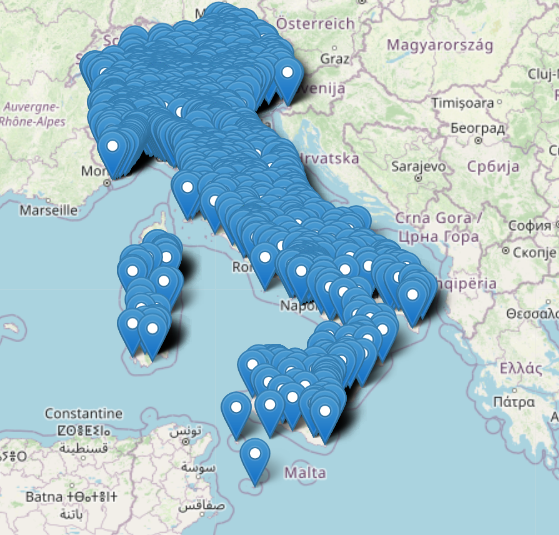

In [ ]:
# We represent the Italian regions with a red scale indicating the average cost of restaurants per region.

#from branca.element import Template, MacroElement

mapping_price = {'€': 1, '€€': 2, '€€€': 3, '€€€€': 4}
df_geo['price_numeric'] = df_geo['priceRange'].map(mapping_price)

# mean price for region
avg_price_by_region = df_geo.groupby('region')['price_numeric'].mean().reset_index()

# For the representation: A folder was downloaded from the INPS website to define the regional boundaries.
regioni = gpd.read_file('Reg01012024/Reg01012024_WGS84.shp') 

regioni = regioni.merge(avg_price_by_region, left_on='DEN_REG', right_on='region')

# Create map on Italy
mappa = folium.Map(location=[41.9028, 12.4964], zoom_start=6)

# Add the choropleth layer
folium.Choropleth(
    geo_data=regioni,
    name='choropleth',
    data=regioni,
    columns=['DEN_REG', 'price_numeric'],
    key_on='feature.properties.DEN_REG',
    fill_color='Reds',
    fill_opacity=1,
    line_opacity=0.2,
    legend_name=None 
).add_to(mappa)

# Personalized Legend
legend_html = '''
<div style="
    position: fixed; 
    top: 15px; right: 10px; 
    width: 430px; height: 93px; 
    background-color: white;
    border: 2px solid grey; 
    box-shadow: 2px 2px 6px rgba(0, 0, 0, 0.3);
    z-index:9999; 
    font-size:14px;
    padding: 10px;
    border-radius: 8px;
">
    <h4 style="margin:0; text-align:center; font-size:18px; font-family: Arial, sans-serif;">Price Restaurant</h4>
    <div style="margin-top: 8px;">
        <div style="background:linear-gradient(to right, #fee5d9, #fcae91, #fb6a4a, #cb181d); height: 20px; border-radius: 5px;"></div>
        <div style="display: flex; justify-content: space-between; font-size: 14px; margin-top: 5px; font-family: Arial, sans-serif;">
            <span>€</span>
            <span>€€€€</span>
        </div>
    </div>
</div>
'''
mappa.get_root().html.add_child(folium.Element(legend_html))

# Save and open the map
file_path = 'map_price_for_region.html'
mappa.save(file_path)
webbrowser.open('file://' + os.path.realpath(file_path))


Below is the resulting map, where the regions are highlighted based on the cost of their restaurants. The map will be saved as a file named `map_price_for_region.html`.

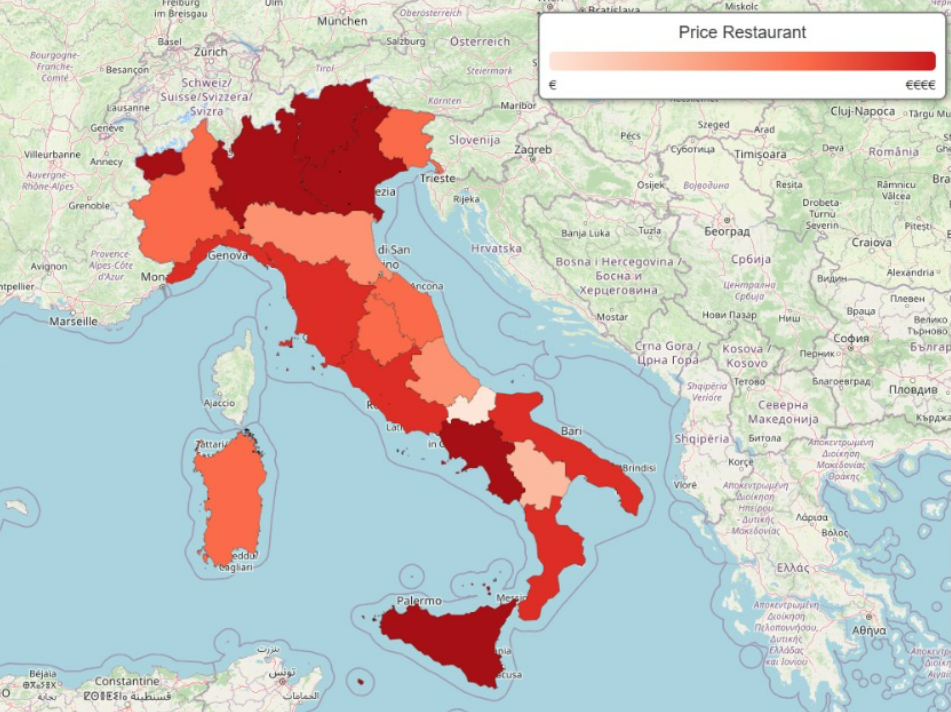

In [27]:
#Wanna visualize only first K restaurant by score obtained in RQ3
df_geo_sorted = df_geo.loc[df_similar.index,:] 
map = folium.Map(location=[41.9028, 12.4964], zoom_start=6)

for index, row in df_geo_sorted.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['restaurantName']}<br>{row['address']}<br>{row['city']}<br>{row['region']}",
        tooltip=row['restaurantName']
    ).add_to(map)

map.fit_bounds([[35.5, 6.6], [47.1, 18.8]])
file_path = 'Top_restaurant_map.html'
map.save(file_path)
webbrowser.open('file://' + os.path.realpath(file_path))


True

Below is the result: an interactive map displaying all the restaurants. Users can zoom in and view the name and address of each restaurant. The map will be saved as a file named `Top_restaurant_map.html`.

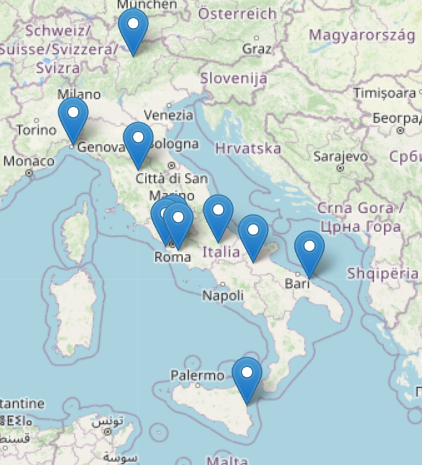

# Advanced Search Engine

The following cell defines the **`UserInputInterface`** class, designed to create an interactive user interface using **ipywidgets**. The goal is to allow users to specify advanced search criteria for restaurants.

Users can specify search terms for the following features (some or all):
- **restaurantName**
- **city**
- **cuisineType**

The other tabs are for filtering by:
- **price range**
- **Region**
- **Accepted credit cards**
- **Offered services**

In [32]:
class UserInputInterface:
    def __init__(self):

        layout_with_description = widgets.Layout(width='50%')
        label_layout = widgets.Layout(description_width='150px')
        
        self.restaurant_name = widgets.Text(placeholder='Name of restaurant', description='Restaurant:')
        self.city = widgets.Text(placeholder='City', description='City:')
        self.cuisine_type = widgets.Text(placeholder='Cucine type', description='Cucine:')

        price_options = {
            '€': 1,
            '€€': 2,
            '€€€': 3,
            '€€€€': 4
        }

        self.price_range = widgets.SelectionRangeSlider(
            options=list(price_options.keys()),
            index=(0, 3),
            description='Price:',
            continuous_update=False
        )

        self.regions = widgets.SelectMultiple(
            options=['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna', 
                     'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche', 
                     'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana', 
                     'Trentino-Alto Adige', 'Umbria', 'Valle d\'Aosta', 'Veneto'],
            description='Region:',
            rows=7
        )

        credit_card_options = ['Amex', 'Dinersclub', 'Mastercard', 'Visa', 'Discover', 'JCB', 'Unionpay', 'Maestro', 'CartaSi']
        self.credit_card_checkboxes = [widgets.Checkbox(value=False, description=card) for card in credit_card_options]

        self.credit_cards_grid = widgets.GridBox(
            children=self.credit_card_checkboxes,
            layout=widgets.Layout(grid_template_columns="repeat(3, 1fr)", gap="10px")
        )

        self.facilities = widgets.SelectMultiple(
            options=['Air conditioning', 'Interesting wine list', 'Wheelchair access', 'Terrace', 'Counter dining',
                     'Great view', 'Garden or park', 'Car park', 'Restaurant offering vegetarian menus', 'Brunch','Valet parking'],
            description='Services:',
            rows=11,
            layout=widgets.Layout(width='400px')
        )

        self.output = widgets.Output()
        self.search_button = widgets.Button(description="Start Search")
        self.search_button.on_click(self.on_search_button_clicked)
    
    def display(self):
        tab = widgets.Tab()
        tab_contents = [
            widgets.VBox([self.restaurant_name, self.city, self.cuisine_type]),
            widgets.VBox([self.price_range]),
            widgets.VBox([self.regions]),
            widgets.VBox([self.credit_cards_grid]),
            widgets.VBox([self.facilities])
        ]
        tab.children = tab_contents
        tab.set_title(0, 'General Criteria')
        tab.set_title(1, 'Price')
        tab.set_title(2, 'Region')
        tab.set_title(3, 'Accepted Cards')
        tab.set_title(4, 'Offered Services')

        display(tab, self.search_button, self.output)

    def get_values(self):
        return {
            'restaurantName': self.restaurant_name.value,
            'city': self.city.value,
            'cuisineType': self.cuisine_type.value,
            'priceRange': self.price_range.value,
            'regions': list(self.regions.value),
            'creditCards': [checkbox.description for checkbox in self.credit_card_checkboxes if checkbox.value],
            'facilities': list(self.facilities.value)
        }

    def on_search_button_clicked(self, b):
        with self.output:
            self.output.clear_output()
            values = self.get_values()
            print("Collected Values:")
            for key, value in values.items():
                print(f"{key}: {value}")

The following cell performs **pre-processing** on the restaurant dataset:

- **Stopwords**: Defines and combines Italian and English stopwords.
- **Cleaning Functions**:
  - **`clean_text_with_stopwords`**: Cleans text by removing stopwords and special characters.
  - **`clean_text_basic`**: Cleans text while keeping all words (used for the `city` field).
- **Cleaning Application**:
  - Creates normalized (`_clean`) versions of the `restaurantName`, `cuisineType`, and `city` fields.
- **Decoding**: Converts `facilitiesServices` and `creditCards` fields into Python lists.
- **Output**: Displays a preview of the pre-processed DataFrame.


In [33]:
# Italian and English stopwords
stopwords_italian = set([
    'il', 'lo', 'la', 'i', 'gli', 'le', 'un', 'una', 'del', 'della', 'dello',
    'dei', 'di', 'a', 'ai', 'al', 'allo', 'alle', 'degli', 'd', 'da', 'dal',
    'dallo', 'in', 'nel', 'nello', 'su', 'sul', 'sullo', 'con', 'per', 'tra',
    'fra', 'e'
])
stopwords_english = set(stopwords.words('english'))
stopwords_combined = stopwords_italian.union(stopwords_english)

# Removing stopwords
def clean_text_with_stopwords(text):
    if pd.isna(text):
        return ''
    text = text.lower().strip()
    text = re.sub(r"[^\w\s']", '', text) 
    words = text.split()
    words = [word for word in words if word not in stopwords_combined]  
    return ' '.join(words)

# Basic clean without removing stopwords
def clean_text_basic(text):
    if pd.isna(text):
        return ''
    return text.strip().lower()

df_geo.loc[:,'restaurantName_clean'] = df_geo['restaurantName'].apply(clean_text_with_stopwords)
df_geo.loc[:,'cuisineType_clean'] = df_geo['cuisineType'].apply(clean_text_with_stopwords)
# For the city field, we do not remove stopwords but apply basic cleaning, as removing them could affect the meaning of the city name.
df_geo.loc[:,'city_clean'] = df_geo['city'].apply(clean_text_basic)

df_geo.loc[:,'facilitiesServices_clean'] = df_geo['facilitiesServices'].apply(lambda x: eval(x) if pd.notna(x) else [])
df_geo.loc[:,'creditCards_clean'] = df_geo['creditCards'].apply(lambda x: eval(x) if pd.notna(x) else [])

print("Pre_processed data:")
display(df_geo[['restaurantName','restaurantName_clean', 'city','city_clean', 'cuisineType','cuisineType_clean', 'facilitiesServices','facilitiesServices_clean', 'creditCards','creditCards_clean','priceRange','region']].head())


Pre_processed data:


,restaurantName,restaurantName_clean,city,city_clean,cuisineType,cuisineType_clean,facilitiesServices,facilitiesServices_clean,creditCards,creditCards_clean,priceRange,region
0,La Corniola,corniola,Pescocostanzo,pescocostanzo,"Modern Cuisine, Cuisine from Abruzzo",modern cuisine cuisine abruzzo,['Wheelchair access'],[Wheelchair access],"['Amex', 'Mastercard', 'Visa']","[Amex, Mastercard, Visa]",€€,Abruzzo
1,Materia | Spazio Cucina,materia spazio cucina,Catania,catania,"Sicilian, Modern Cuisine",sicilian modern cuisine,"['Air conditioning', 'Restaurant offering vege...","[Air conditioning, Restaurant offering vegetar...","['Amex', 'Dinersclub', 'Mastercard', 'Visa']","[Amex, Dinersclub, Mastercard, Visa]",€€,Sicilia
2,Gallery Bistrot Contemporaneo,gallery bistrot contemporaneo,Troia,troia,"Modern Cuisine, Creative",modern cuisine creative,['Air conditioning'],[Air conditioning],"['Mastercard', 'Visa']","[Mastercard, Visa]",€€,Puglia
3,Sintesi,sintesi,Ariccia,ariccia,"Contemporary, Seasonal Cuisine",contemporary seasonal cuisine,"['Air conditioning', 'Car park']","[Air conditioning, Car park]","['Amex', 'Dinersclub', 'Mastercard', 'Visa']","[Amex, Dinersclub, Mastercard, Visa]",€€€,Lazio
4,Radimare,radimare,Monopoli,monopoli,"Modern Cuisine, Mediterranean Cuisine",modern cuisine mediterranean cuisine,"['Air conditioning', 'Wheelchair access']","[Air conditioning, Wheelchair access]","['Dinersclub', 'Mastercard', 'Visa']","[Dinersclub, Mastercard, Visa]",€€,Puglia


In [34]:
# Function to create an inverted index for a specific field
def build_inverted_index(df, column):
    inverted_index = defaultdict(set)  
    for idx, value in df[column].items():
        terms = value.split() 
        for term in terms:
            inverted_index[term].add(idx) 
    return inverted_index

# Creation of inverted indices
restaurant_name_index = build_inverted_index(df_geo, 'restaurantName_clean')
city_index = build_inverted_index(df_geo, 'city_clean')
cuisine_type_index = build_inverted_index(df_geo, 'cuisineType_clean')

The following cell implements the **advanced search**:

- **`search_inverted_indices`**:
  - Searches indexed fields for terms provided by the user.
  - Calculates a score for each result based on term matches.

- **`advanced_search_with_filters`**:
  - Applies the same cleaning process to both user input and indexed fields.
  - Filters raw results using additional criteria: **price range**, **accepted credit cards**, and **offered services**.
  - Sorts and returns the most relevant results.


In [35]:
# Function to search within indexed fields and calculate scores
def search_inverted_indices(query, indices):
    results = defaultdict(int) 

    for field, terms in query.items():
        if field not in indices:
            continue
        for term in terms.split(): 
            if term in indices[field]:
                for idx in indices[field][term]:
                    results[idx] += 1 
    
    return results

def advanced_search_with_filters(user_input, indices, df, top_n=10):
    price_order = {
        '€': 1,
        '€€': 2,
        '€€€': 3,
        '€€€€': 4
    }

    # Apply the same cleaning process used for specific fields in the dataset to the user input as well.
    query = {
        'restaurantName_clean': clean_text_with_stopwords(user_input['restaurantName']),
        'city_clean': clean_text_with_stopwords(user_input['city']),
        'cuisineType_clean': clean_text_with_stopwords(user_input['cuisineType'])
    }

    raw_results = search_inverted_indices(query, indices)

    # Filter the results based on additional criteria such as price, region, accepted credit cards, and offered services.
    filtered_results = []
    for idx, score in raw_results.items():
        row = df.loc[idx]

        # Price filter
        if not (price_order[row['priceRange']] >= price_order[user_input['priceRange'][0]] and
                price_order[row['priceRange']] <= price_order[user_input['priceRange'][1]]):
            continue

        # Cards Filter
        if not all(card in row['creditCards_clean'] for card in user_input['creditCards']):
            continue

        # Services Filter
        if not all(facility in row['facilitiesServices_clean'] for facility in user_input['facilities']):
            continue

        # Region Filter
        if user_input['regions'] and row['region'] not in user_input['regions']:
            continue
        
        
        filtered_results.append((idx, score))

    sorted_results = sorted(filtered_results, key=lambda x: x[1], reverse=True)
    top_results = df.loc[[r[0] for r in sorted_results[:top_n]]]

    return top_results[['restaurantName', 'address', 'cuisineType', 'priceRange', 'website']]


In [36]:
# UI
ui = UserInputInterface()
ui.display()

Button(description='Start Search', style=ButtonStyle())

Output()

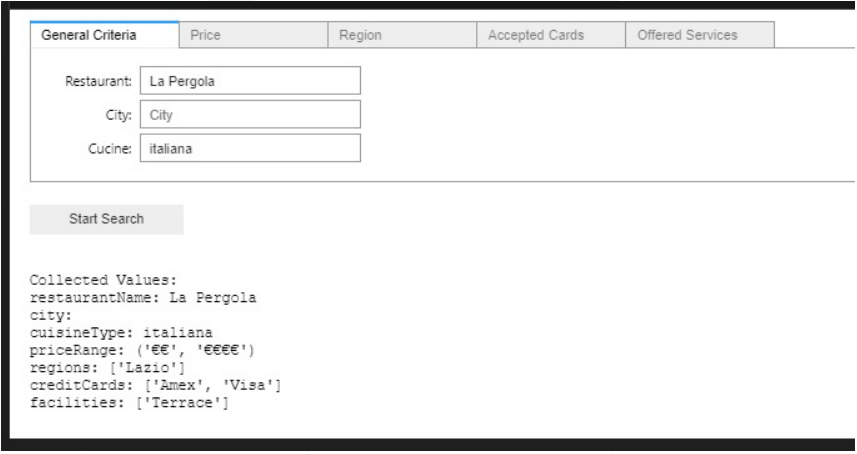

In [37]:
#Result
user_input = ui.get_values()
print(user_input)
indices = {
    'restaurantName_clean': restaurant_name_index,
    'city_clean': city_index,
    'cuisineType_clean': cuisine_type_index
}
results = advanced_search_with_filters(user_input, indices, df_geo)#here needs sobstitute df with df_geo 
display(results)


{'restaurantName': '', 'city': '', 'cuisineType': '', 'priceRange': ('€', '€€€€'), 'regions': [], 'creditCards': [], 'facilities': []}


,restaurantName,address,cuisineType,priceRange,website


# Algorithmic Question (AQ)
A robot is in a warehouse represented by a coordinate grid and needs to collect
n packages. It starts at (0,0)
, and the i-th package is at (xi,yi). No two packages are at the same coordinates, and (0,0) is empty. The robot can only move up('U') or right ('R'), either from (x,y) to (x+1,y) or (x,y+1). The goal is to collect all
n packages with the fewest moves, choosing the lexicographically smallest path if multiple shortest paths exist.

In [ ]:
PackageCollector(t):
    for each test_case from 1 to t:                                           #O(t * n * log n)
        input n  # Number of packages                                           #O(1)
        packages = empty list                                                   #O(1)
        for i from 1 to n:                                                      #O(2n)
            input x, y  # Coordinates of the i-th package                         #O(1)
            packages.append (x, y)                                                #O(1)
        # Sort packages by x-coordinate, then by y-coordinate
        packages.sort(x, y)                                                     #O(n * log n)
        curr_x = 0                                                                #O(1)
        curr_y = 0                                                                #O(1)
        path = empty string                                                       #O(1)
        possible = true                                                           #O(1)
        for each (x, y) in packages:                                            #O(n)
            if x < curr_x or y < curr_y THEN:                                     #O(2)
                possible = false                                                    #O(1)
                break													                                      #O(1)
            # Calculate the number of moves needed
            n_right_moves = x - curr_x										                        #O(1)
            n_up_moves = y - curr_y											                          #O(1)
            # Append moves to the path
            path.append('R' * num_right_moves)						                        #O(1)
            path.append ('U' * num_up_moves)						                          #O(1)
            # Update current position
            curr_x = x														                                #O(1)
            curr_y = y														                                #O(1)
        if  possible then:													                            #O(1)
            print "YES"													                                  #O(1)
            print path												                                    #O(1)
        else:															                                      #O(1)
            print "NO"													                                  #O(1)

PackageCollector takes the number of test cases t as input. For each test case, it reads the number of packages n and initializes an empty list packages to store the coordinates. It reads the coordinates of each package and appends them to the packages list. The packages are sorted based on their x and y coordinates to ensure that the robot can only move right or up. The robot starts at the origin (0, 0) and initializes the current position and path. It iterates through the sorted list of packages, checking if each package is reachable. If a package is unreachable (i.e., if it is below or to the left of the current position), it sets possible to FALSE and breaks out of the loop. If reachable, it calculates the number of right and up moves needed and appends the corresponding characters to the path. After processing all packages, it prints "YES" and the path if all packages are reachable; otherwise, it prints "NO".

### 2. Prove that your algorithm is correct.

**Poof of correctness:** The robot starts at the origin (0, 0) and can only move right ('R') or up ('U'). Each package has unique coordinates, and the robot must collect all packages in the fewest moves possible. The path must be lexicographically smallest if multiple shortest paths exist. The algorithm sorts the packages by their x-coordinates and then by their y-coordinates. This sorting is crucial because after sorting, the robot can only move to the right or up to reach the next package. If the robot encounters a package with a smaller x-coordinate or a smaller y-coordinate than its current position, it cannot reach that package without moving left or down, which is not allowed. So, the sorted order guarantees that the robot can always reach the next package in the list. the algorithm constructs the path by calculating the number of right and up moves required to reach each package: The number of right moves to reach a package at (x, y) from the current position (x_current, y_current) is given by num_right_moves = x - curr_x. The number of up moves is given by num_up_moves = y - curr_y. Since the robot can only move right or up, the path constructed by appending 'R' for right moves and 'U' for up moves is valid and respects the movement constraints.
This ensures that the path is lexicographically smallest because 'R' comes before 'U' in the string. If there are multiple ways to reach a package, the algorithm always chooses the right moves first, thus ensuring the smallest possible string representation of the path.


### 3. Compute the time complexity of your algorithm in Big O notation. Break down the steps involved in the algorithm, and explain which parts contribute most to the overall time complexity.

**Overall Time Complexity:** combining the time complexities of each step, we get that the *dominant term* in this analysis is the sorting step, which is ( O(n * log n) ). Therefore, the overall time complexity for each test case is:
[ O(n * log n) ]. If we consider ( t ) test cases, the total time complexity becomes [ O(t * n * log n) ]
where ( n ) is the maximum number of packages in any test case. Since ( t ) can be at most 10 and ( n ) can be at most 100, the algorithm is efficient and runs within acceptable limits for the given constraints.

### 4. Ask an LLM tool (such as ChatGPT, Claude AI, Gemini, Perplexity, etc.) to evaluate the time complexity of your code using Big O notation. Is the assessment accurate? If it differs from your previous analysis, which would be correct? Please explain your reasoning.

**LLM Time Complexity:**

To analyze the time complexity of this code, let's break it down step by step:
1. Input reading:
    * The outer loop runs t times (where t is the input).
    * For each iteration, we read n packages (where n is the number of packages in that test case).
2. Package processing:
    * We sort the packages once per test case, which takes O(n log n) time.
3. Path construction:
    * We iterate through all packages once, performing constant-time operations for each package.
4. Output:
    * The output is printed once per test case, regardless of the size of the input.
Now, let's analyze the overall complexity:
1. Input reading: O(t * n)
    * Each input operation is O(1), but we're doing this t times and n times within each iteration.
2. Sorting: O(n log n)
    * This happens once per test case.
3. Path construction: O(n)
    * We iterate through all packages once.
The dominant factor in the time complexity will be the sorting operation, which occurs once per test case. Therefore, the overall time complexity of this algorithm is O(t * (n log n + n)).
Simplifying, we can say that the time complexity is approximately O(t * n log n), as the linear term becomes negligible compared to the logarithmic term for large values of n.
Key points to consider:
* The sorting operation is crucial here, as it determines the overall time complexity.
* If the packages were already sorted, the time complexity would reduce to O(t * n).
* The algorithm's performance could be improved by using a more efficient sorting algorithm or by avoiding sorting altogether if the packages can be processed in a different order.

LLM gave the same results in terms of time complexity for the algorithm as the algorithm above.

### 4. Assume now that the robot can also move towards the left or downwards, and consider the greedy approach: from the current location go to the closest package. Notice that now we can always collect all packages. Prove that the greedy algorithm is optimal (i.e., it minimizes the total distance traveled), or provide a counterexample showing that it is not.


**The greedy algorithm:**
1. Start at the origin (0, 0).
2. At each step, move to the closest package based on the Manhattan distance (the sum of the absolute differences of the coordinates).
3. Repeat until all packages are collected.
Proof of Optimality or Counterexample
To prove that the greedy algorithm is optimal, we need to show that it always results in the minimum total distance traveled. However, we can provide a counterexample to demonstrate that the greedy approach may not yield the optimal solution.

**Counterexample:** To demonstrate that the greedy algorithm is not always optimal, consider the following scenario:

       Test Case: (1, 2), (2, 1), (3, 0)

Using the greedy algorithm:

* Start at (0, 0). The closest package is (1, 2), so move to (1, 2).
From (1, 2), the next closest package is (2, 1), so move to (2, 1).
Finally, from (2, 1), move to (3, 0).
The path taken would be:

* Move R to (1, 0) -> U to (1, 1) -> U to (1, 2) -> R to (2, 2) -> L to (2, 1) -> R to (3, 1) -> D to (3, 0).
However, the optimal path to collect all packages would be:

* Move R to (1, 0) -> U to (1, 1) -> U to (1, 2) -> R to (2, 2) -> R to (3, 2) -> D to (3, 1) -> D to (3, 0).

This shows that the greedy approach can lead to a longer path than necessary.
